In [3]:
import numpy as np
import pandas as pd
from utils.utils import load_datasets
from utils.utils import select_features
from models.model_regression import GradientBoosting_Regression
from models.model_regression import RandomForest_Regression
from models.model_regression import Stacking_Regression
from models.model_classification import Stacking_Classification
from plotting.plotting_regression import plots_regression
from plotting.plotting_classification import plots_classification

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')

In [5]:
# loading the datasets 
load_data = load_datasets()
# regression
Xr_train, Xr_test, yr_train, yr_test = load_data.regression_dataset()
# classification 
Xc_train, Xc_test, yc_train, yc_test = load_data.classification_dataset()


In [6]:
# selecting the relevant features 
sel = select_features()
sel_features_reg = sel.selection(Xr_train, yr_train)
sel_features_class = sel.selection(Xc_train, yc_train)

Xr_train, Xr_test = sel.df_feature_selection(Xr_train, Xr_test, sel_features = sel_features_reg)
Xc_train, Xc_test = sel.df_feature_selection(Xc_train, Xc_test, sel_features = sel_features_class)


### Regression analysis

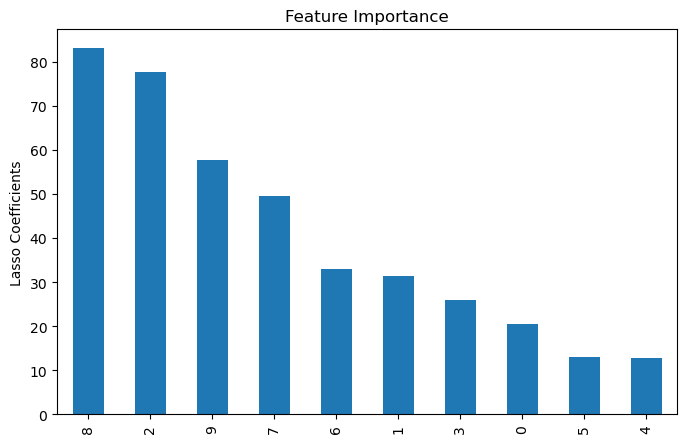

In [7]:
# plot feature importance, and make the selection
plotter_reg = plots_regression(Xr_train, yr_train, Xr_test, yr_test)
feat_importance = plotter_reg.plot_feature_importance(sel_features_reg)

In [8]:
# finding the models hyperparameters  by doing a grid scan over them
model_builder_reg = Stacking_Regression()
RF_model_reg_best = model_builder_reg.RF_hyperparameters(Xr_train, np.ravel(yr_train))
GB_model_reg_best = model_builder_reg.GB_hyperparameters(Xr_train, np.ravel(yr_train))

 Results from Grid Search for Random Forest

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=10, n_estimators=500)

 The best score across ALL searched params:
 0.7995561649163424

 The best parameters across ALL searched params:
 {'max_depth': 10, 'n_estimators': 500}
 Results from Grid Search for Gradient Boosting

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=1500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.9683871711631626

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.1}


In [9]:
# Building the models

# Random Forest
RF_model_reg = RF_model_reg_best

# Gradient Boosting 
GB_model_reg = GB_model_reg_best

# Stacking RF+GB
estimators1 = [('Random Forest', RF_model_reg),
                ('Gradient Boosting', GB_model_reg)]
Stack_model_reg1 = model_builder_reg.Stack_model(estimators=estimators1)

# Stacking GB+RF
estimators2 = [('Gradient Boosting', GB_model_reg), 
                ('Random Forest', RF_model_reg),]
Stack_model_reg2 = model_builder_reg.Stack_model(estimators=estimators2)

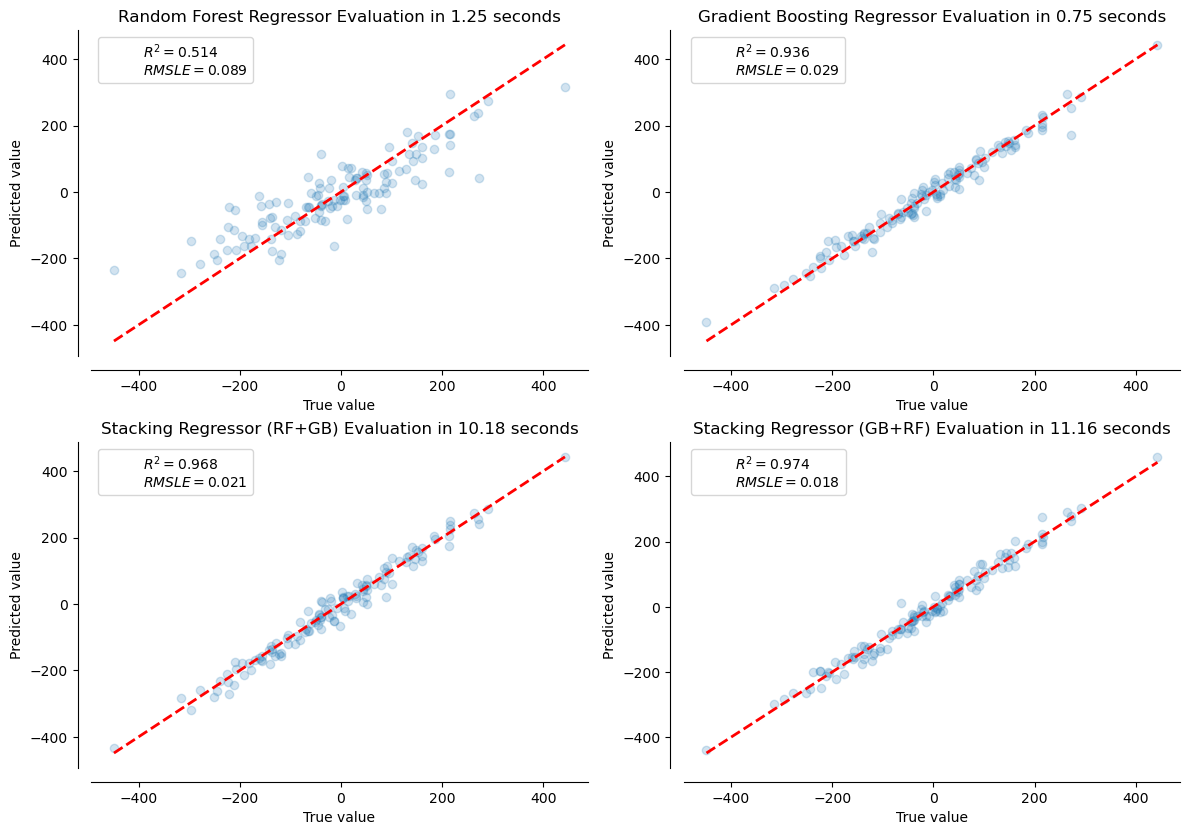

In [10]:
# plotting the results (true value vs predicted value)
models_reg = [('Random Forest Regressor', RF_model_reg),
            ('Gradient Boosting Regressor', GB_model_reg),
            ('Stacking Regressor (RF+GB)', Stack_model_reg1),
            ('Stacking Regressor (GB+RF)', Stack_model_reg2)]
plotter_reg.plot_comparison_regression(models_reg)


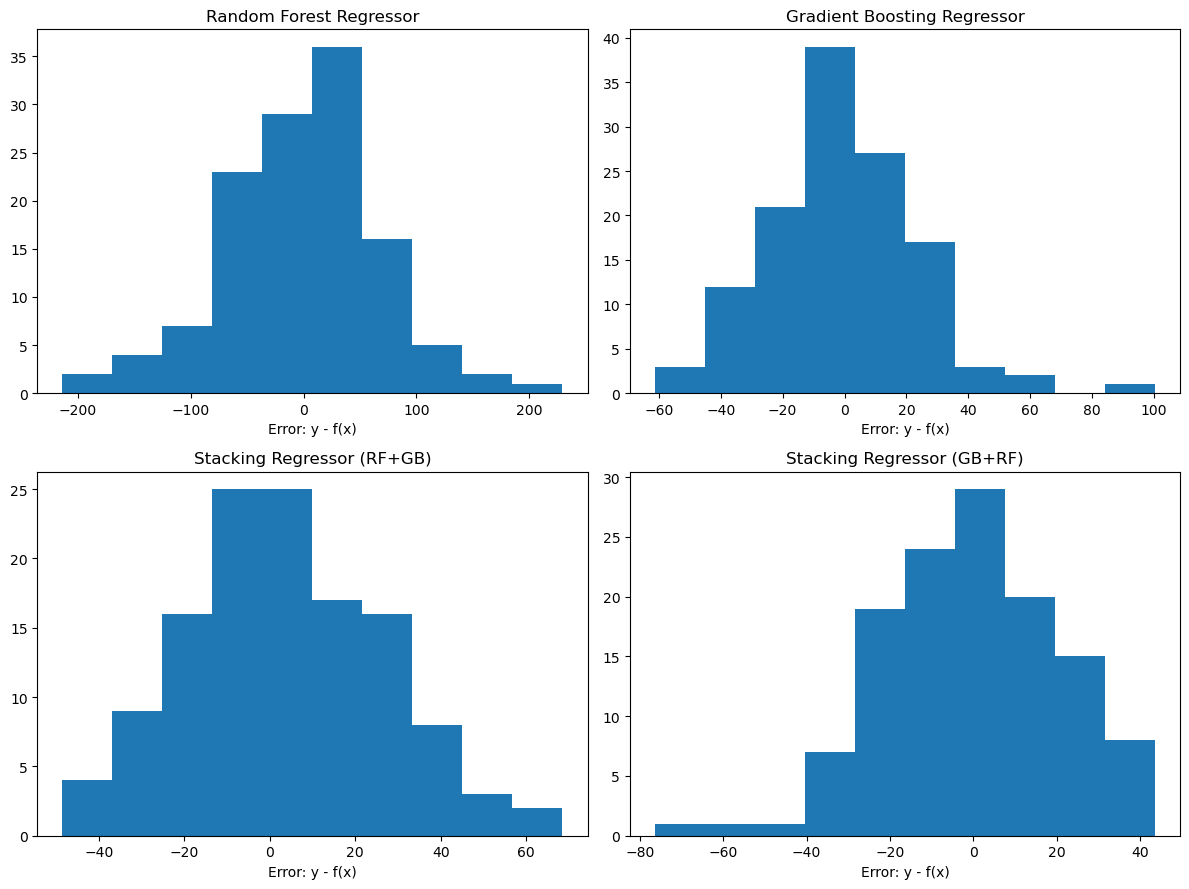

In [11]:
# plot the difference between y and the prediction
plotter_reg.plot_error(models_reg)

### Classification analysis

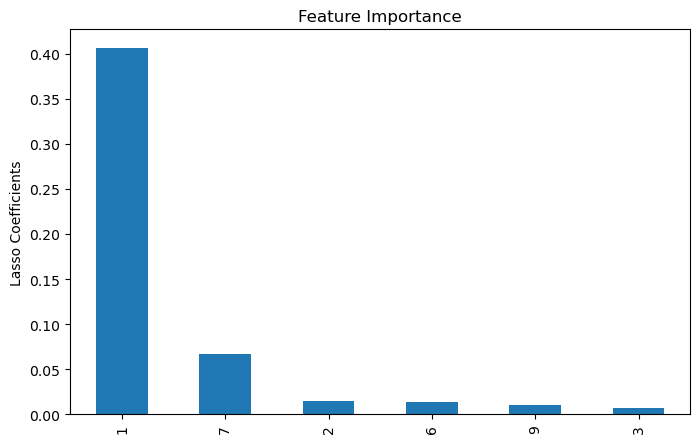

In [12]:
# plot feature importance, and make the selection
plotter_class = plots_classification(Xc_train, yc_train, Xc_test, yc_test)
feat_importance = plotter_class.plot_feature_importance(sel_features_class)

In [13]:
# finding the models hyperparameters  by doing a grid scan over them
model_builder_class = Stacking_Classification()
RF_model_class_best = model_builder_class.RF_hyperparameters(Xc_train, np.ravel(yc_train))
GB_model_class_best = model_builder_class.GB_hyperparameters(Xc_train, np.ravel(yc_train))

 Results from Grid Search for Random Forest

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=4)

 The best score across ALL searched params:
 0.9867021276595744

 The best parameters across ALL searched params:
 {'max_depth': 4, 'n_estimators': 100}
 Results from Grid Search for Gradient Boosting

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.04, max_depth=4, n_estimators=1500,
                           subsample=0.1)

 The best score across ALL searched params:
 0.9920212765957447

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.1}


In [14]:
# building the models 

# Random Forest
RF_model_class = RF_model_class_best

# Gradient Boosting
GB_model_class = GB_model_class_best

# Stacking RF+GB
estimators1 = [('Random Forest', RF_model_class),
                ('Gradient Boosting', GB_model_class)]
Stack_model_class1 = model_builder_class.Stack_model(estimators=estimators1)

# Stacking GB+RF
estimators2 = [('Gradient Boosting', GB_model_class),
                ('Random Forest', RF_model_class),]
Stack_model_class2 = model_builder_class.Stack_model(estimators=estimators2)

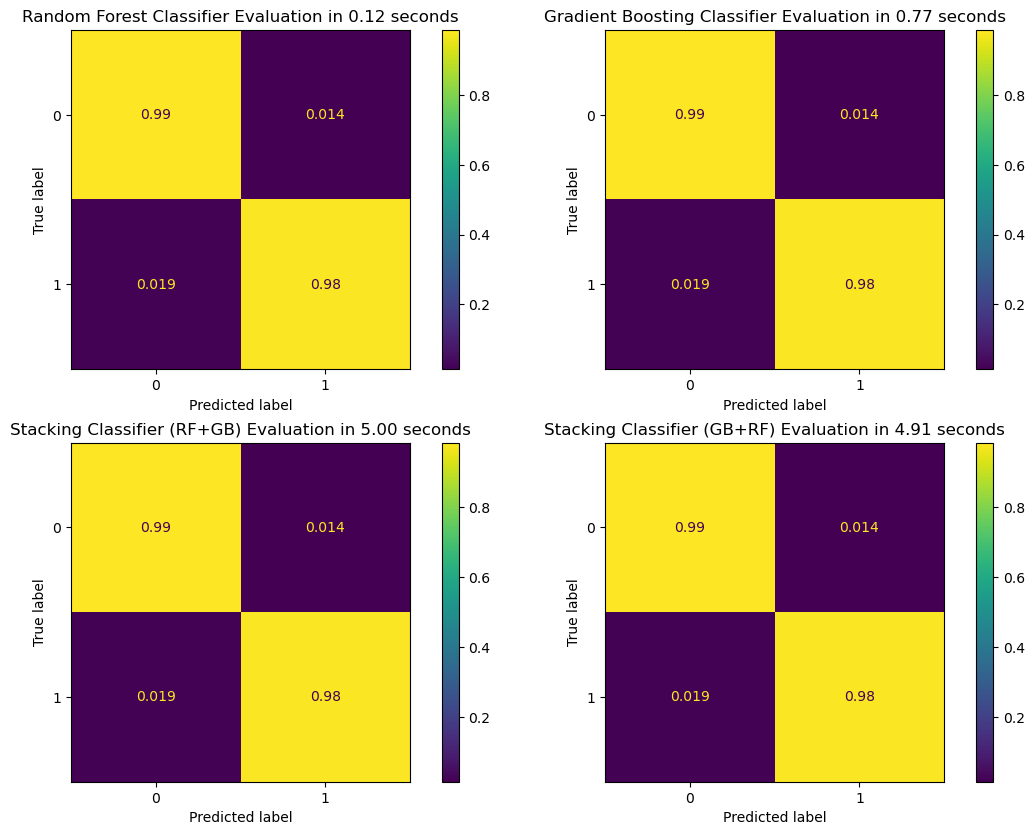

In [15]:
# plotting the results (confussion matrices)
models_class = [('Random Forest Classifier', RF_model_class),
            ('Gradient Boosting Classifier', GB_model_class),
            ('Stacking Classifier (RF+GB)', Stack_model_class1),
            ('Stacking Classifier (GB+RF)', Stack_model_class2)]
plotter_class = plots_classification(Xc_train, yc_train, Xc_test, yc_test)
plotter_class.plot_confussion(models_class)